In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import the dataset
customers = pd.read_csv("/Users/adamdanielgreen/Desktop/Business Statistics/Clustering-20231215/customers.csv")

In [3]:
# Select columns of interest
customers2 = customers[["recency.z", "frequency.z", "monetary.z"]]

# To determine an appropriate value for k
wss = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, n_init=25, max_iter=50, random_state=0)
    kmeans.fit(customers2)
    wss.append(kmeans.inertia_)

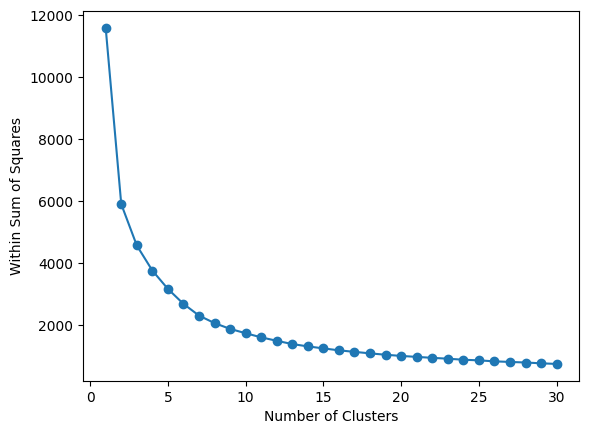

In [4]:
# Plot the Within Sum of Squares (WSS) for different values of k
plt.plot(range(1, 31), wss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Sum of Squares")
plt.show()

In [5]:
# Choose k=5 based on the elbow method
k = 5
kmeans = KMeans(n_clusters=k, n_init=25, max_iter=50, random_state=0)
kmeans.fit(customers2)

# Visualize the clusters and centroids
df = pd.DataFrame(customers2, columns=["recency.z", "frequency.z", "monetary.z"])
df["cluster"] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=["recency.z", "frequency.z", "monetary.z"])

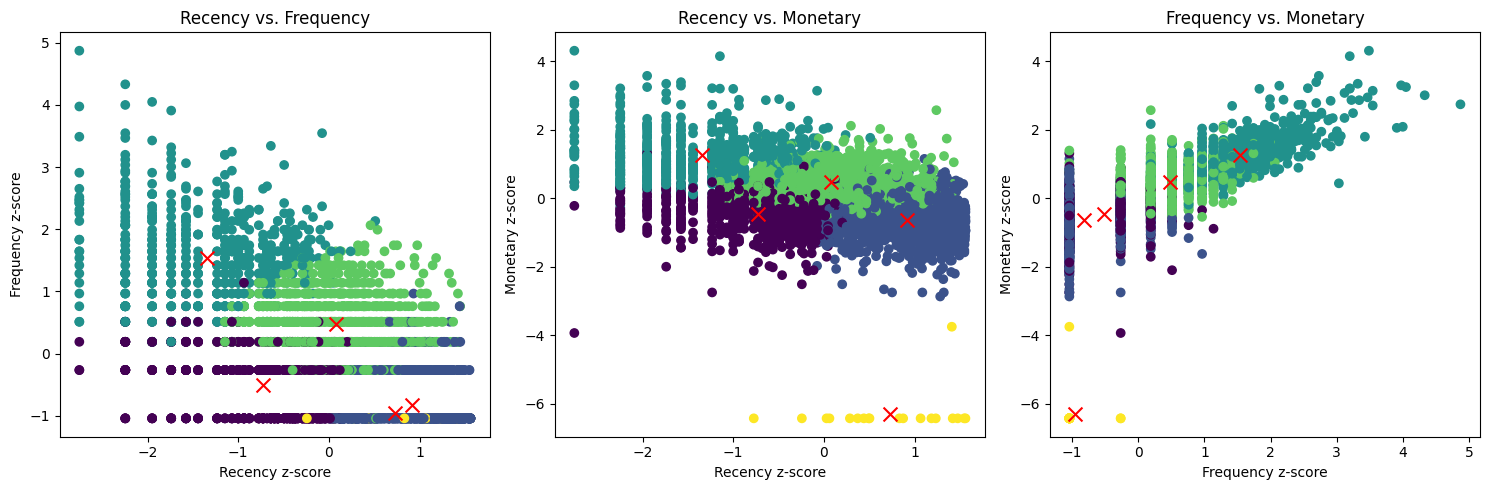

In [6]:
# Scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(df["recency.z"], df["frequency.z"], c=df["cluster"], cmap='viridis')
plt.scatter(centers["recency.z"], centers["frequency.z"], c='red', s=100, marker='x', label='Centroids')
plt.xlabel("Recency z-score")
plt.ylabel("Frequency z-score")
plt.title("Recency vs. Frequency")

plt.subplot(132)
plt.scatter(df["recency.z"], df["monetary.z"], c=df["cluster"], cmap='viridis')
plt.scatter(centers["recency.z"], centers["monetary.z"], c='red', s=100, marker='x', label='Centroids')
plt.xlabel("Recency z-score")
plt.ylabel("Monetary z-score")
plt.title("Recency vs. Monetary")

plt.subplot(133)
plt.scatter(df["frequency.z"], df["monetary.z"], c=df["cluster"], cmap='viridis')
plt.scatter(centers["frequency.z"], centers["monetary.z"], c='red', s=100, marker='x', label='Centroids')
plt.xlabel("Frequency z-score")
plt.ylabel("Monetary z-score")
plt.title("Frequency vs. Monetary")

plt.tight_layout()
plt.show()